In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ast

In [15]:
df = pd.read_csv('C:/Users/Sameer/OneDrive/Desktop/MOVIE_RATING/tmdb_5000_movies.csv')



In [17]:
df = df.dropna(subset=['vote_average', 'budget', 'genres', 'popularity', 'runtime', 'revenue', 'production_countries'])

In [19]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.801000e+03,4801.000000,4801.000000,4.801000e+03,4801.000000,4801.000000,4801.000000
mean,2.905402e+07,57016.320142,21.501089,8.229491e+07,106.875859,6.093189,690.503020
std,4.072821e+07,88406.741790,31.820361,1.628824e+08,22.611935,1.191493,1234.764044
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9013.000000,4.680206,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14624.000000,12.928269,1.917997e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58574.000000,28.350529,9.292120e+07,118.000000,6.800000,737.000000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [21]:
def parse_json_column(column):
    return column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else[])

In [23]:
df['genres'] = parse_json_column(df['genres'])
df['keywords'] = parse_json_column(df['keywords'])

In [25]:
df['main_genre'] = df['genres'].apply(lambda x: x[0]['name'] if x else 'Unknown')

In [27]:
df['production_countries'] = df['production_countries'].apply(lambda x: x[0]['name'] if isinstance(x, list) else 'Unknown')
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: x[0]['name'] if isinstance(x, list) else 'Unknown')


In [29]:
df = df.drop(columns=['genres', 'keywords', 'homepage', 'production_companies'])

In [31]:
X = df[['budget', 'popularity', 'runtime', 'main_genre', 'production_countries', 'spoken_languages']]
y = df['vote_average']


In [33]:
numeric_features = ['budget', 'popularity', 'runtime']
categorical_features = ['main_genre', 'production_countries', 'spoken_languages']

In [35]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [45]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['budget', 'popularity',
                                                   'runtime']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['main_genre',
                                                   'production_countries',
                                                   'spoken_languages'])])),
                ('regressor', LinearRegression())])

In [47]:
y_pred = model.predict(X_test)

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [51]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.684088819251678
Mean Squared Error: 1.0893232753027837
Root Mean Squared Error: 1.0437065082209576
R-squared: 0.22601122179229727


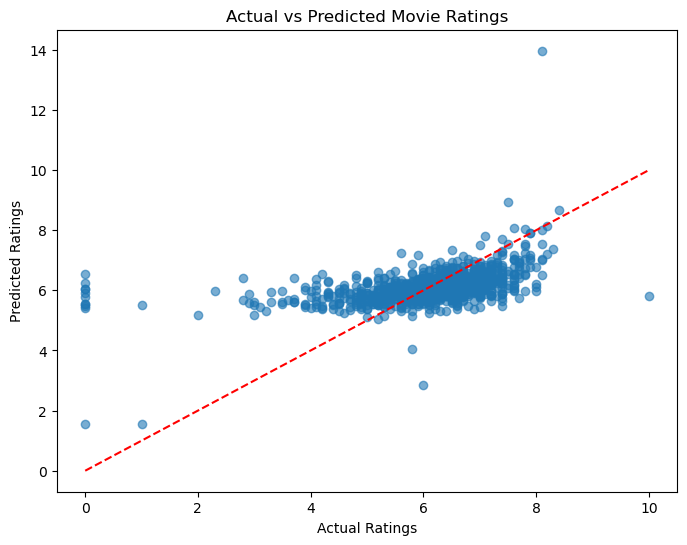

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')
plt.show()


In [ ]:
Conclusion
#model shows that budget and popularity have a strong correlation with ratings, this suggests that movies with higher budgets and better-known status (popularity) tend to get better ratings.